## Connect COLAB with Google Drive

- Running the below script in colab shell and follwing instruction as below:

<p align="center">
    <img src="https://github.com/quangnhat185/Machine_learning_projects/blob/master/Gun_detection_Yolov3/Y_1.jpg">
</p>

- After click the and sign in, you should have something like this: 

<p align="center">
    <img src="https://github.com/quangnhat185/Machine_learning_projects/blob/master/Gun_detection_Yolov3/Y_1.jpg">
</p>(https://github.com/quangnhat185/Machine_learning_projects/blob/master/Gun_detection_Yolov3/autho_code.png)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Check your GPU compatibility with CUDA, as you can see COLAB GPU has CUDA 10.0 installed

In [2]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2018 NVIDIA Corporation
Built on Sat_Aug_25_21:08:01_CDT_2018
Cuda compilation tools, release 10.0, V10.0.130


## Load dataset and darknet folder to COLAB working space by unzip file "darknet.zip"

- Use syntax !unzip + <path_to_darknet.zip_in_your_GDrive> to extract folder darknet. In my case, **"darknet.zip"** locates in **My Drive/Sharing_storage1**

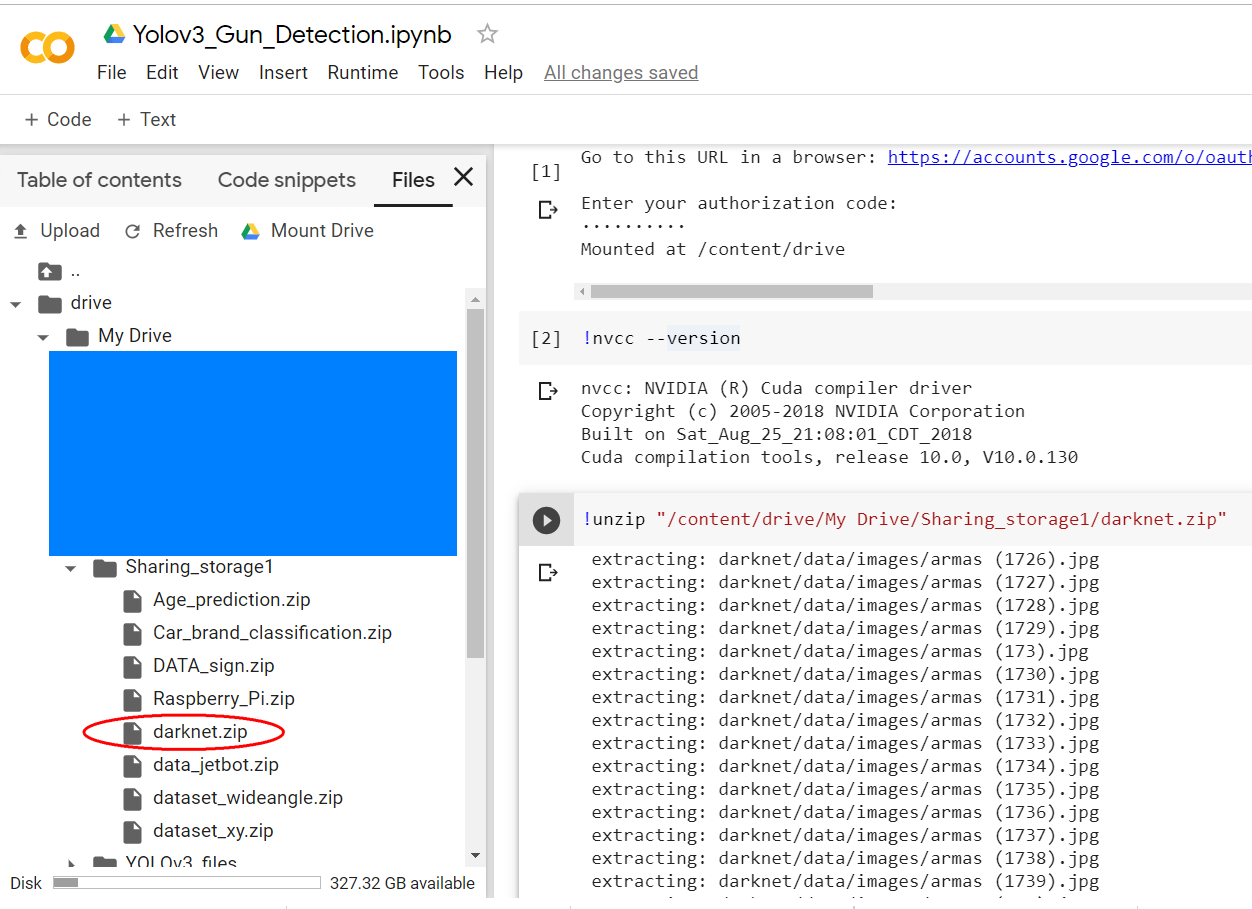

In [3]:
!unzip "/content/drive/My Drive/Sharing_storage1/darknet.zip"

Archive:  /content/drive/My Drive/Sharing_storage1/darknet.zip
   creating: darknet/
   creating: darknet/.git/
 extracting: darknet/.git/config     
 extracting: darknet/.git/description  
 extracting: darknet/.git/HEAD       
   creating: darknet/.git/hooks/
 extracting: darknet/.git/hooks/applypatch-msg.sample  
 extracting: darknet/.git/hooks/commit-msg.sample  
 extracting: darknet/.git/hooks/fsmonitor-watchman.sample  
 extracting: darknet/.git/hooks/post-update.sample  
 extracting: darknet/.git/hooks/pre-applypatch.sample  
 extracting: darknet/.git/hooks/pre-commit.sample  
 extracting: darknet/.git/hooks/pre-push.sample  
 extracting: darknet/.git/hooks/pre-rebase.sample  
 extracting: darknet/.git/hooks/pre-receive.sample  
 extracting: darknet/.git/hooks/prepare-commit-msg.sample  
 extracting: darknet/.git/hooks/update.sample  
 extracting: darknet/.git/index      
   creating: darknet/.git/info/
 extracting: darknet/.git/info/exclude  
   creating: darknet/.git/logs/
 ext

## Compile darknet directory with below script:

In [4]:
%cd /content/darknet 
!make
!chmod +x ./darknet

/content/darknet
mkdir -p obj
mkdir -p backup
mkdir -p results
gcc -Iinclude/ -Isrc/ -DOPENCV `pkg-config --cflags opencv`  -DGPU -I/usr/local/cuda/include/ -DCUDNN  -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -c ./src/gemm.c -o obj/gemm.o
./src/gemm.c: In function ‘time_gpu’:
./src/gemm.c:232:9: warning: ‘cudaThreadSynchronize’ is deprecated [-Wdeprecated-declarations]
         cudaThreadSynchronize();
         ^~~~~~~~~~~~~~~~~~~~~
In file included from /usr/local/cuda/include/cuda_runtime.h:96:0,
                 from include/darknet.h:11,
                 from ./src/utils.h:5,
                 from ./src/gemm.c:2:
/usr/local/cuda/include/cuda_runtime_api.h:947:57: note: declared here
 extern __CUDA_DEPRECATED __host__ cudaError_t CUDARTAPI cudaThreadSynchronize(void);
                                                         ^~~~~~~~~~~~~~~~~~~~~
gcc -Iinclude/ -Isrc/ -DOPENCV `pkg-config --cflags opencv`  -DGPU -I/usr/local/cuda/

## Save weight during training in your Google Drive 

This step is important since COLAB environment will be recycle after 12 hours and all files locate in its working space will be deleted. Here we defines a symbolic link to save the weight directly into our **backup** folder which we created in our GDrive before. In my case, my **backup** folder directory is **My Drive/YOLOv3_weight/backup**.

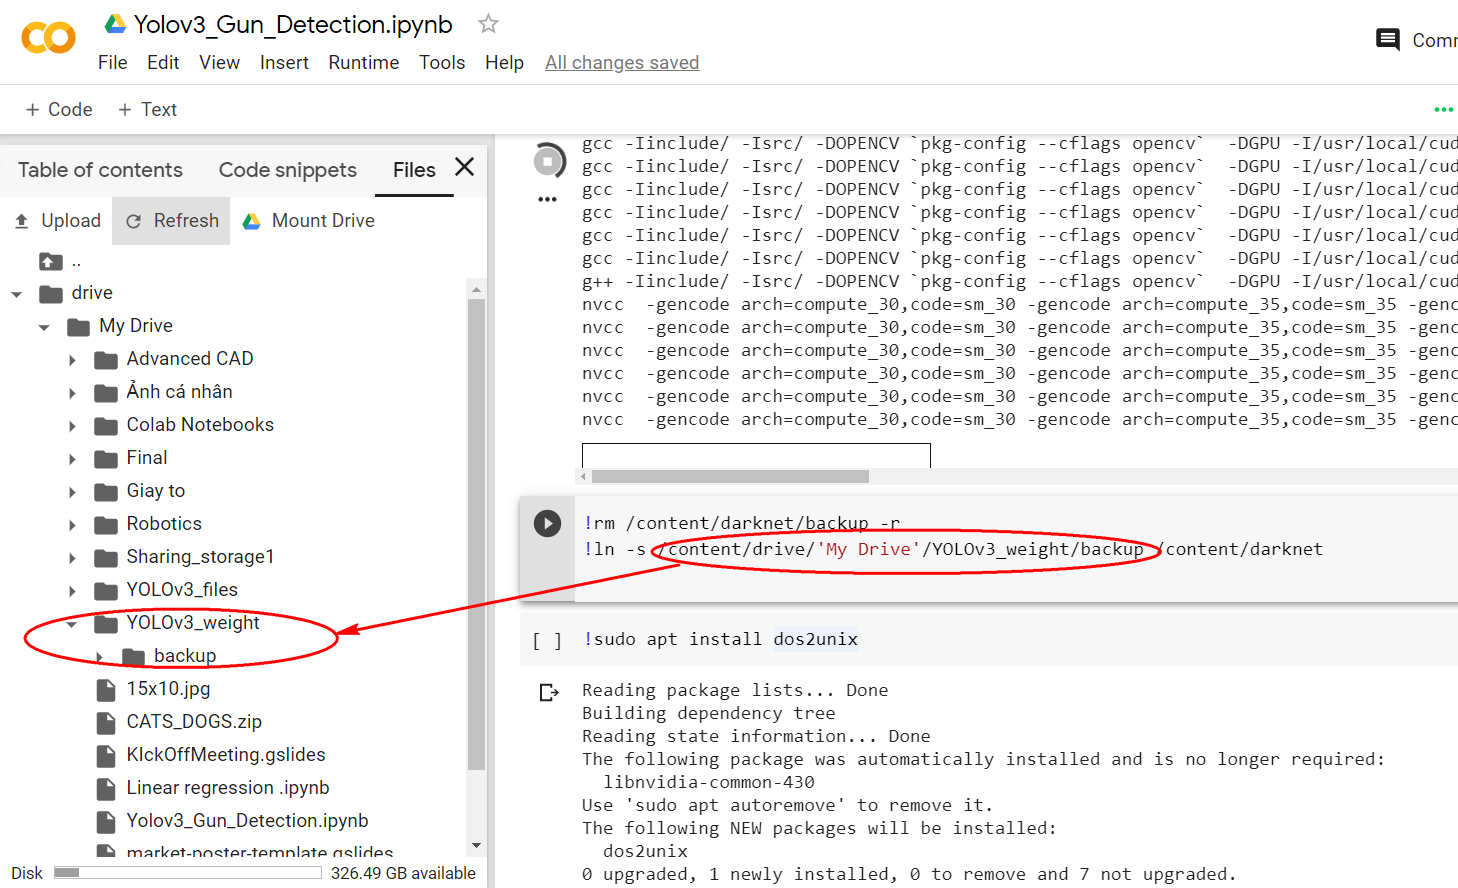

In [0]:
!rm /content/darknet/backup -r
!ln -s /content/drive/'My Drive'/YOLOv3_weight/backup /content/darknet

## Install dos2unix to convert train.txt, val.txt, yolo.data, yolo.names, yolov3_custom_train.cfg to unix

In [6]:
!sudo apt install dos2unix

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  dos2unix
0 upgraded, 1 newly installed, 0 to remove and 7 not upgraded.
Need to get 351 kB of archives.
After this operation, 1,267 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 dos2unix amd64 7.3.4-3 [351 kB]
Fetched 351 kB in 0s (4,399 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-precon

In [7]:
!dos2unix ./data/train.txt
!dos2unix ./data/val.txt
!dos2unix ./data/yolo.data
!dos2unix ./data/yolo.names
!dos2unix ./cfg/yolov3_custom_train.cfg

dos2unix: converting file ./data/train.txt to Unix format...
dos2unix: converting file ./data/val.txt to Unix format...
dos2unix: converting file ./data/yolo.data to Unix format...
dos2unix: converting file ./data/yolo.names to Unix format...
dos2unix: converting file ./cfg/yolov3_custom_train.cfg to Unix format...


## Finally, let's train our model

In [8]:
%cd /content/darknet
!./darknet detector train data/yolo.data cfg/yolov3_custom_train.cfg darknet53.conv.74

/content/darknet
yolov3_custom_train
layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32  0.299 BFLOPs
    1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64  1.595 BFLOPs
    2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32  0.177 BFLOPs
    3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64  1.595 BFLOPs
    4 res    1                 208 x 208 x  64   ->   208 x 208 x  64
    5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128  1.595 BFLOPs
    6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64  0.177 BFLOPs
    7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128  1.595 BFLOPs
    8 res    5                 104 x 104 x 128   ->   104 x 104 x 128
    9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64  0.177 BFLOPs
   10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128  1.595 BFLOPs


## Retrain yolov3 model with saved weight

In case the the your COLAB sever is recycled and you do not want to train your model from beginning, you need to execute all the above steps again but this time, change **darknet53.conv.74** to directory of your saved. For example, if I already had a weight files trained for 900 epochs, I can resume the training using script below:

In [ ]:
!./darknet detector train data/yolo.data cfg/yolov3_custom_train.cfg backup/yolov3_900.weights

# The End!